# Introdução a algoritmos não supervisionados

In [2]:
import pandas as pd

In [3]:
uri_filmes = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/movies.csv'

filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [6]:
from sklearn.cluster import KMeans

In [7]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [1 1 2 ... 2 1 2]


In [8]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.46106852 -0.13821776 -0.23540992 -0.26485464 -0.5989386
   0.69152775 -0.21296155 -0.00865138 -0.15614222  0.3248567   0.50448678
  -0.03534658 -0.17808375  0.64521421 -0.30671584  0.19386775  1.70532628
  -0.10513149 -0.06686865]
 [-0.05917995  0.51590872  1.52478358  1.61726924  1.41169375 -0.01068051
  -0.30468412 -0.20985804 -0.65484085  1.15713367 -0.09492563 -0.24440587
   0.61183659  0.26447886 -0.14558356 -0.29276917  0.58758908 -0.4191778
  -0.17344268 -0.0832281 ]
 [ 0.03156947 -0.25685023 -0.25661699 -0.24244874 -0.19175377  0.20264776
  -0.17100081  0.11298757  0.13297822 -0.17758354 -0.0899062  -0.12035309
  -0.10970496  0.00708513 -0.18709966  0.16084673 -0.1816298  -0.4876793
   0

In [9]:
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.461069,-0.138218,-0.235410,-0.264855,-0.598939,0.691528,-0.212962,-0.008651,-0.156142,0.324857,0.504487,-0.035347,-0.178084,0.645214,-0.306716,0.193868,1.705326,-0.105131,-0.066869
1,-0.059180,0.515909,1.524784,1.617269,1.411694,-0.010681,-0.304684,-0.209858,-0.654841,1.157134,-0.094926,-0.244406,0.611837,0.264479,-0.145584,-0.292769,0.587589,-0.419178,-0.173443,-0.083228
2,0.031569,-0.256850,-0.256617,-0.242449,-0.191754,0.202648,-0.171001,0.112988,0.132978,-0.177584,-0.089906,-0.120353,-0.109705,0.007085,-0.187100,0.160847,-0.181630,-0.487679,0.069652,0.038921


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f332e0f6d30>,
      dtype=object)

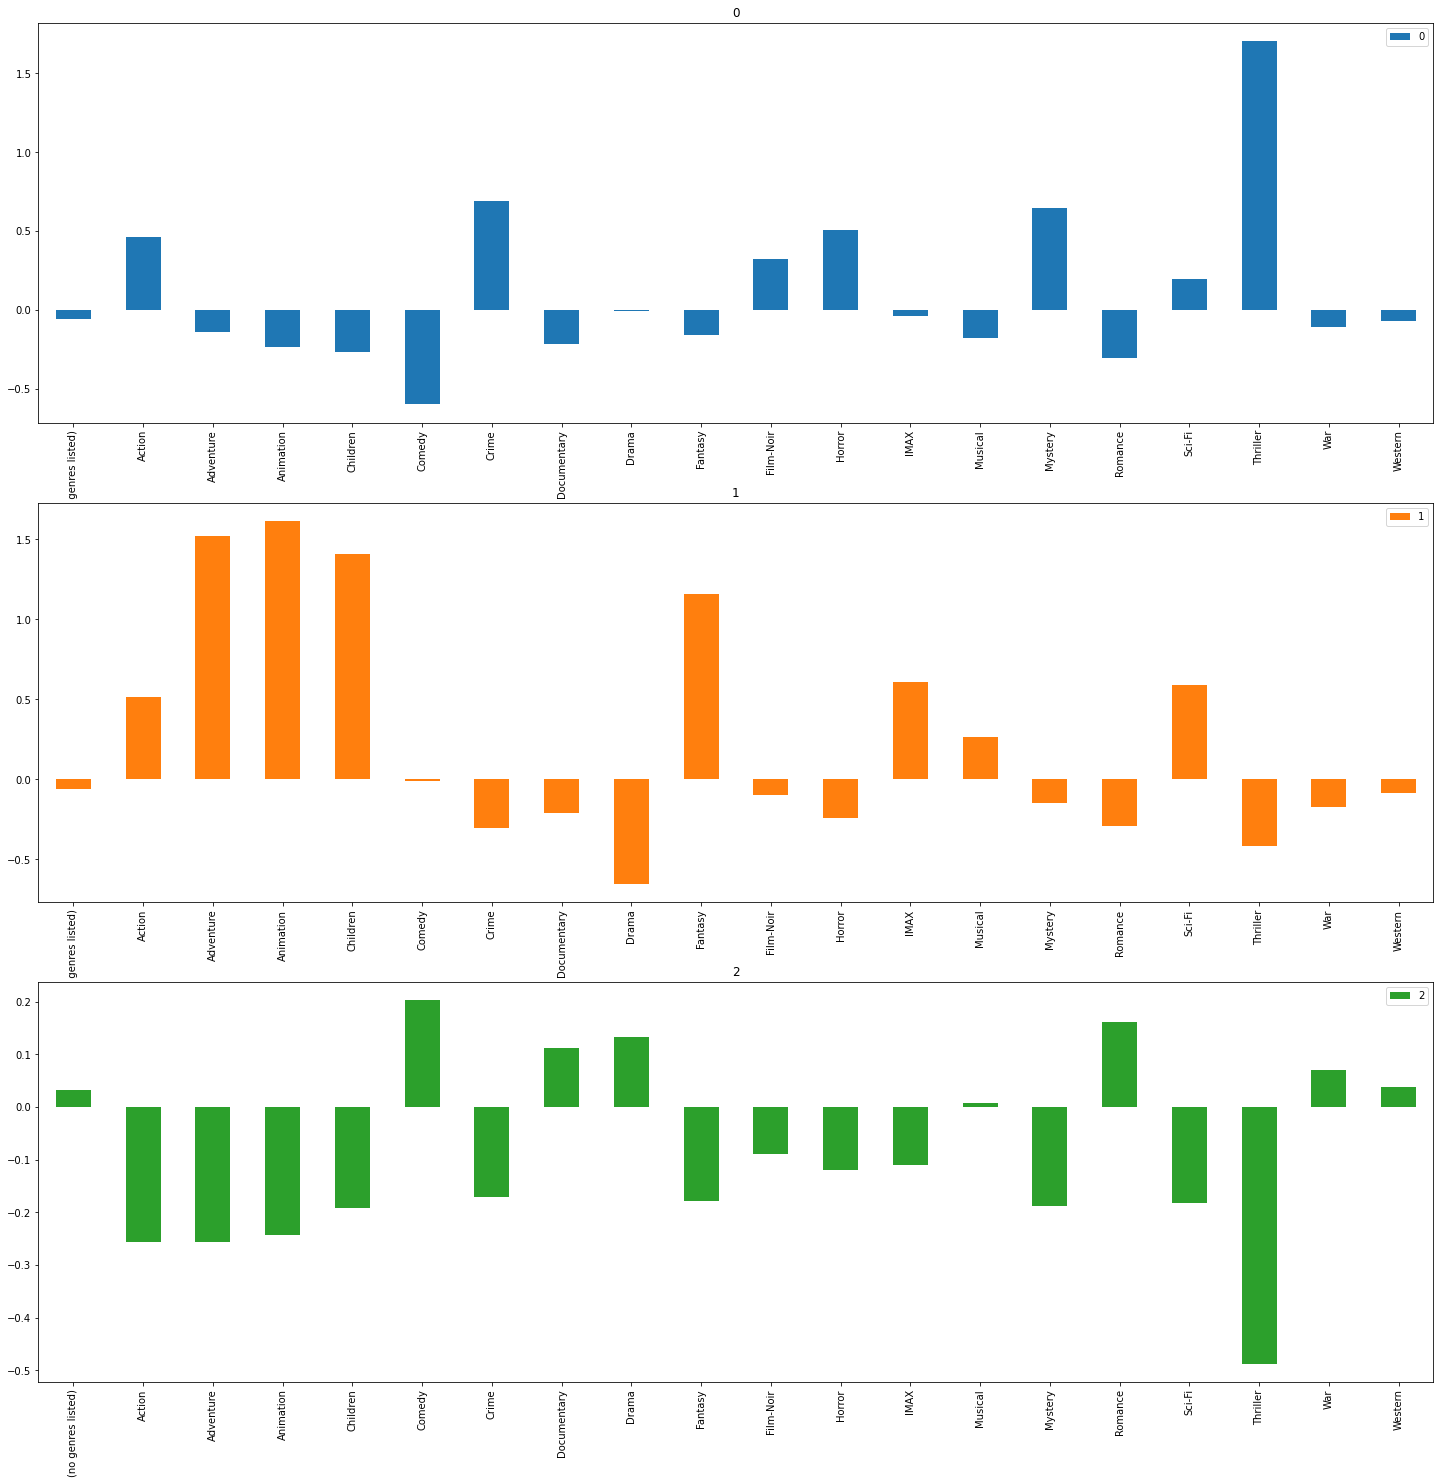

In [10]:
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 25),
               sharex=False)

In [11]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6678,57843,Rise of the Footsoldier (2007),Action|Crime|Drama,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
9263,156706,The Trust (2016),Crime|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1155,1518,Breakdown (1997),Action|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1726,2320,Apt Pupil (1998),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5882,33158,xXx: State of the Union (2005),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4725,7047,Year of the Dragon (1985),Action|Crime|Drama,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4477,6615,Freddy vs. Jason (2003),Action|Horror|Thriller,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2822,3770,Dreamscape (1984),Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
1325,1792,U.S. Marshals (1998),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1076,1396,Sneakers (1992),Action|Comedy|Crime|Drama|Sci-Fi,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [12]:
from sklearn.manifold import TSNE

In [13]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 43.952328 , -41.230545 ],
       [-56.606457 ,  30.308834 ],
       [ 12.33501  ,  -1.3511869],
       ...,
       [-16.930979 ,  10.321775 ],
       [ 37.470413 , -12.708162 ],
       [ -6.7697725, -27.382425 ]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


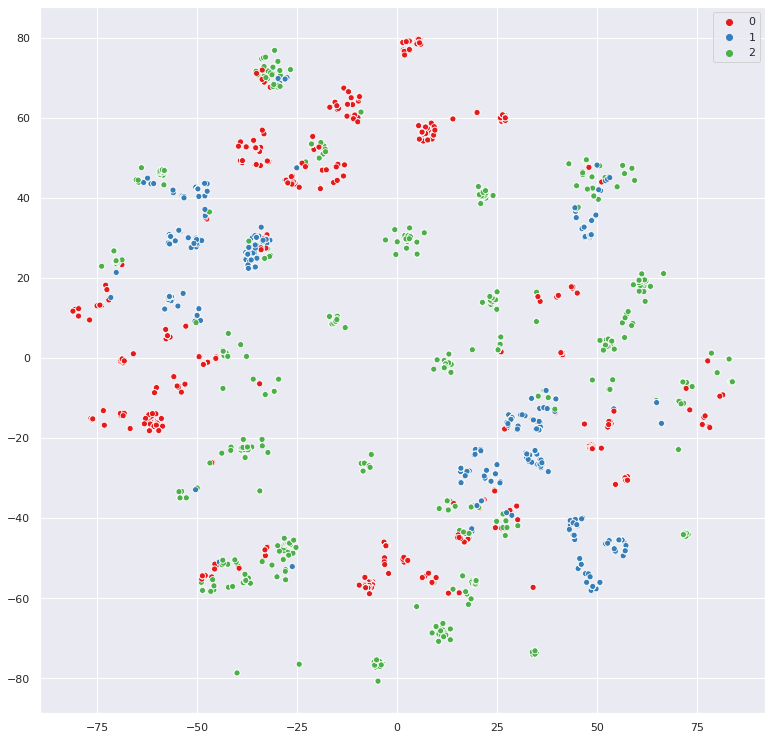

In [14]:
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})



sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette('Set1', 3))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f332dac64a8>,
      dtype=object)

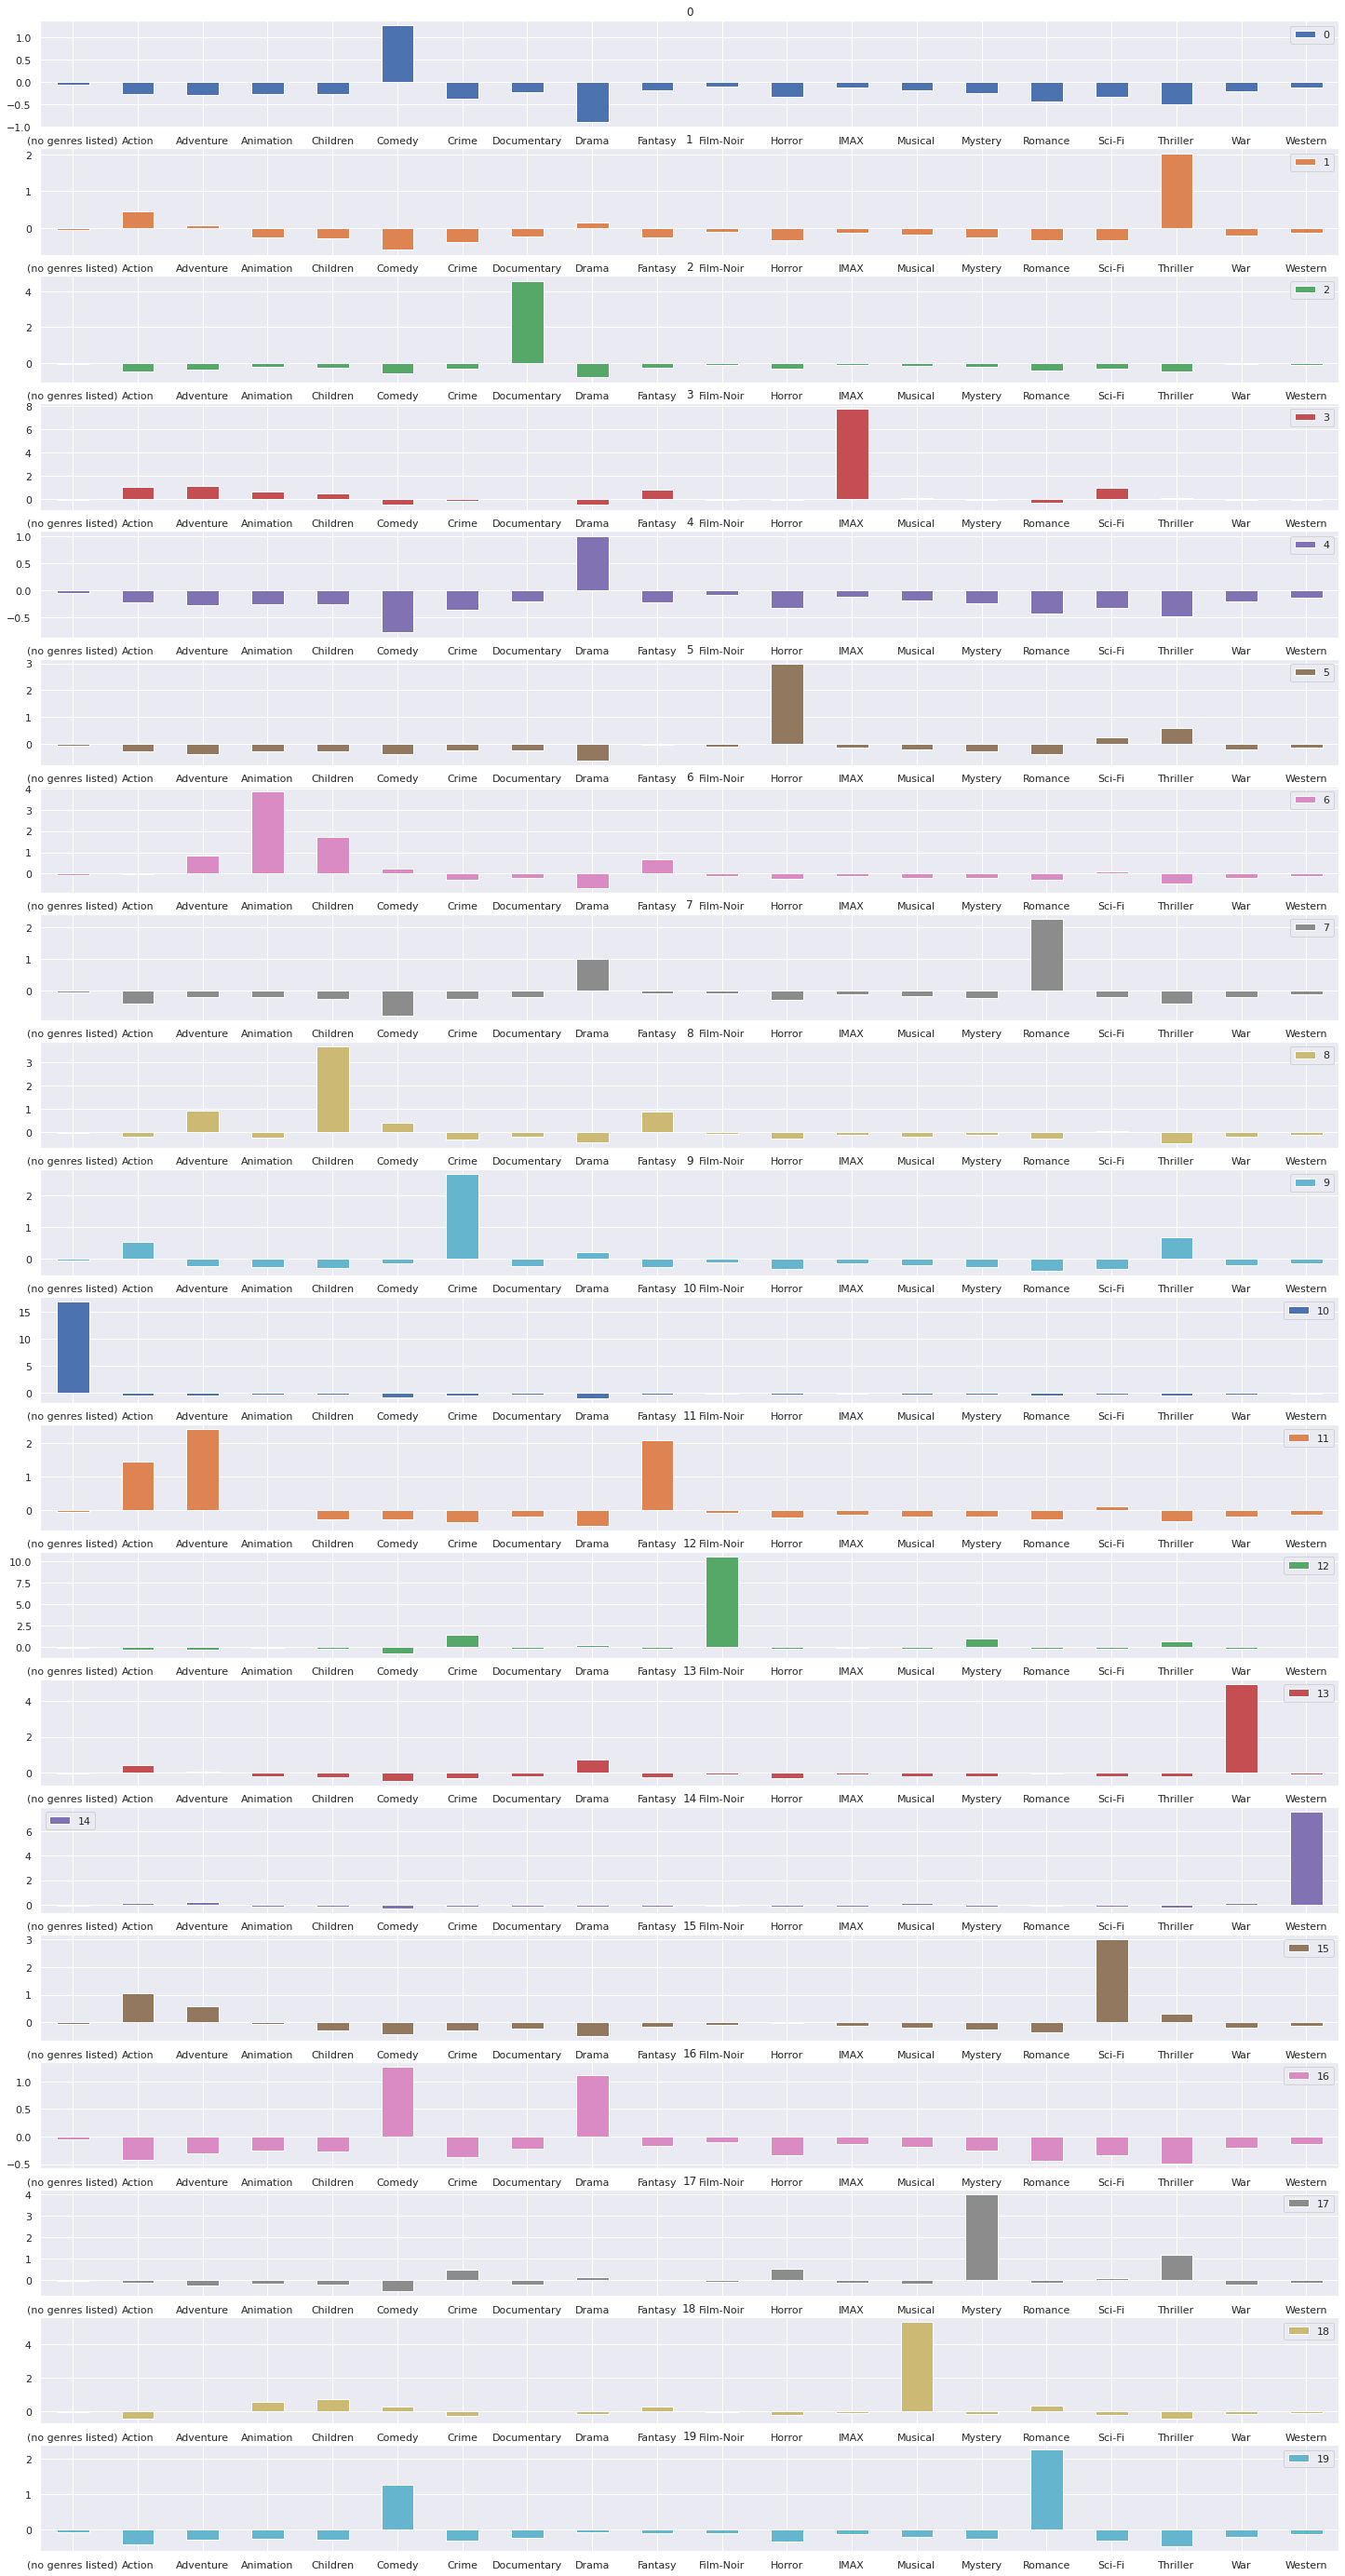

In [15]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [16]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7135,71282,"Food, Inc. (2008)",Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2499,3338,For All Mankind (1989),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8740,127172,A Story of Children and Film (2013),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2465,3281,"Brandon Teena Story, The (1998)",Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8367,109282,GLOW: The Story of the Gorgeous Ladies of Wres...,Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5731,27912,Outfoxed: Rupert Murdoch's War on Journalism (...,Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3133,4217,4 Little Girls (1997),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7738,90769,Starsuckers (2009),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7468,81910,"Art of the Steal, The (2009)",Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9652,180265,Jim & Andy: The Great Beyond (2017),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [18]:
kmeans(20, generos_escalados)

[20, 55192.17429156911]

In [19]:
kmeans(3, generos_escalados)

[3, 167770.97338490852]

In [20]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179559.0578232338],
 [3, 166085.5962804719],
 [4, 155798.76129364542],
 [5, 147036.56516333303],
 [6, 137190.46711305657],
 [7, 129535.6189600436],
 [8, 120483.52127843011],
 [9, 111204.85977700687],
 [10, 102249.18037283518],
 [11, 93377.62430909408],
 [12, 87521.62057070936],
 [13, 82553.10541444768],
 [14, 74566.45361766824],
 [15, 71233.73905165409],
 [16, 64512.73621475762],
 [17, 61989.243992813244],
 [18, 59349.86439461725],
 [19, 57485.40848602289],
 [20, 55297.74403351881],
 [21, 52308.518540294564],
 [22, 51322.60785350996],
 [23, 50772.96118982008],
 [24, 49792.70439587136],
 [25, 48085.620830234126],
 [26, 46425.94260729031],
 [27, 46051.83838146697],
 [28, 45208.953084905566],
 [29, 44049.965774187316],
 [30, 43698.33365664688],
 [31, 41469.94322699081],
 [32, 41509.1571588389],
 [33, 40872.808659896975],
 [34, 39228.30513147018],
 [35, 38468.45385988213],
 [36, 38375.402771668596],
 [37, 37769.02285074173],
 [38, 36417.454426509874],
 [39, 35825.04111

In [21]:
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179559.057823
2,3,166085.596280
3,4,155798.761294
4,5,147036.565163
5,6,137190.467113
6,7,129535.618960
7,8,120483.521278
8,9,111204.859777
9,10,102249.180373


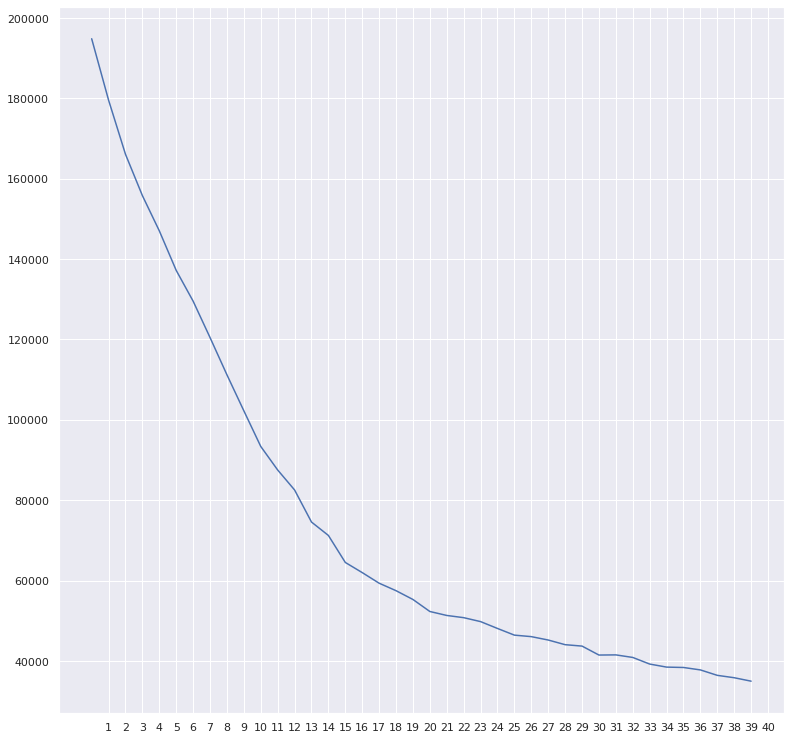

In [22]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f332a02bcf8>,
      dtype=object)

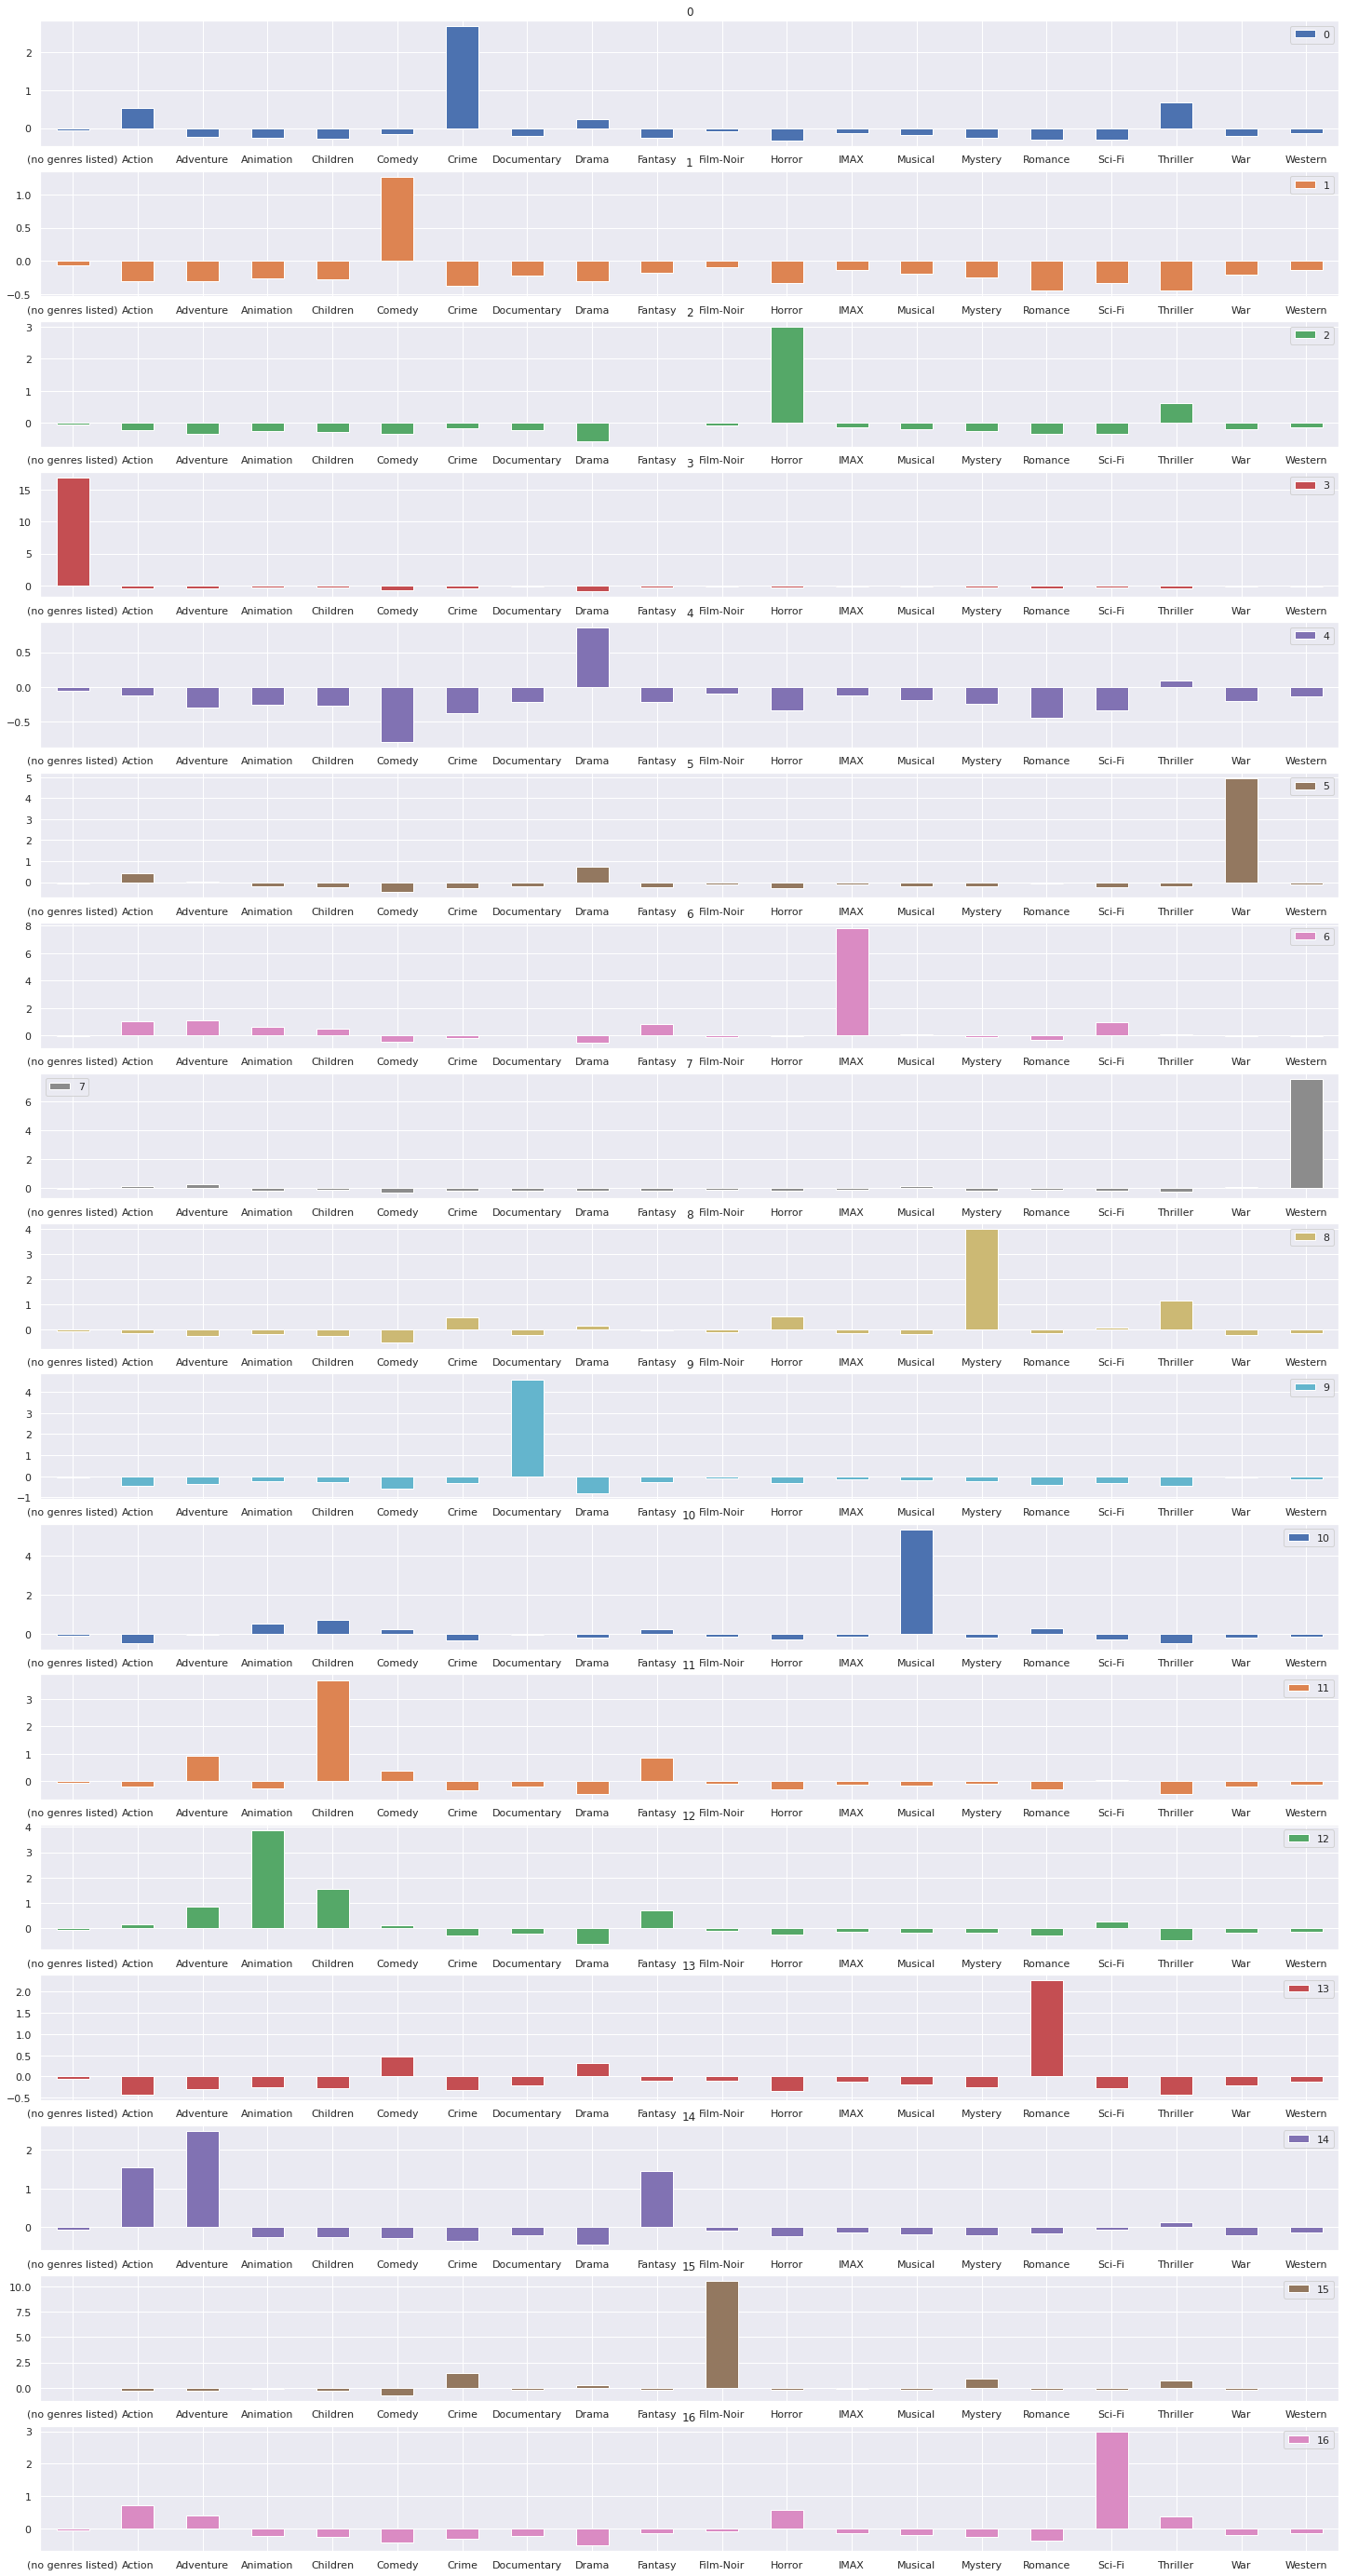

In [23]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [24]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9403,164881,Night Guards (2016),Action|Sci-Fi,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6769,60037,"Happening, The (2008)",Drama|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
9351,161044,Webmaster (1998),Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6877,62836,Babylon 5: The Lost Tales - Voices in the Dark...,Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1592,2134,Weird Science (1985),Comedy|Fantasy|Sci-Fi,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3605,4952,Morons From Outer Space (1985),Comedy|Sci-Fi,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8721,126426,Solyaris (1968),Drama|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3056,4092,Cherry 2000 (1987),Romance|Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3821,5356,"Giant Spider Invasion, The (1975)",Horror|Sci-Fi,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6623,56022,Harrison Bergeron (1995),Drama|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [27]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  0.8878696,  68.487885 ],
       [-30.290325 , -34.8893   ],
       [-37.266872 ,  11.607684 ],
       ...,
       [-11.338587 ,  18.871004 ],
       [ 44.946346 ,  12.799163 ],
       [ 16.556513 , -10.194986 ]], dtype=float32)

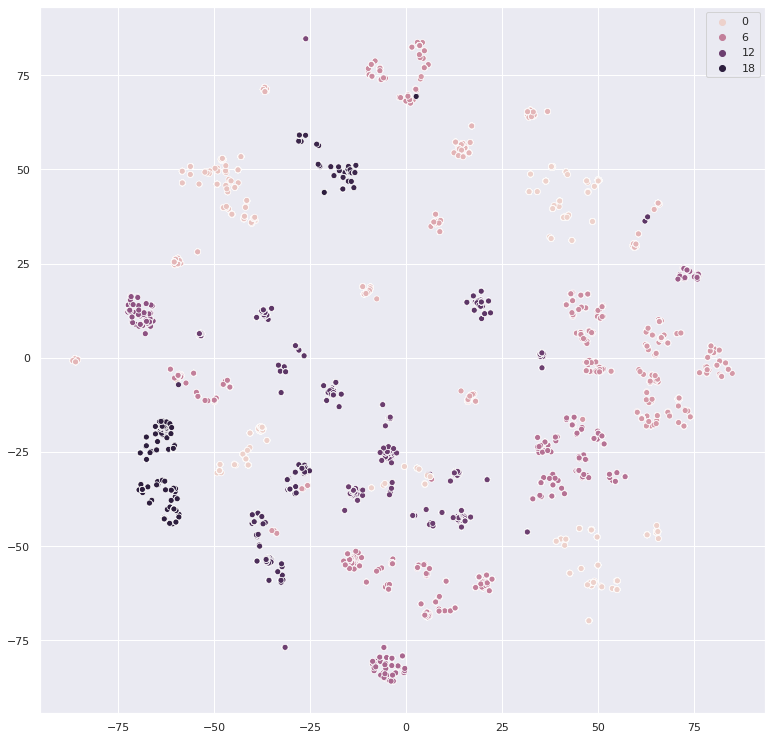

In [28]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33299aad68>,
      dtype=object)

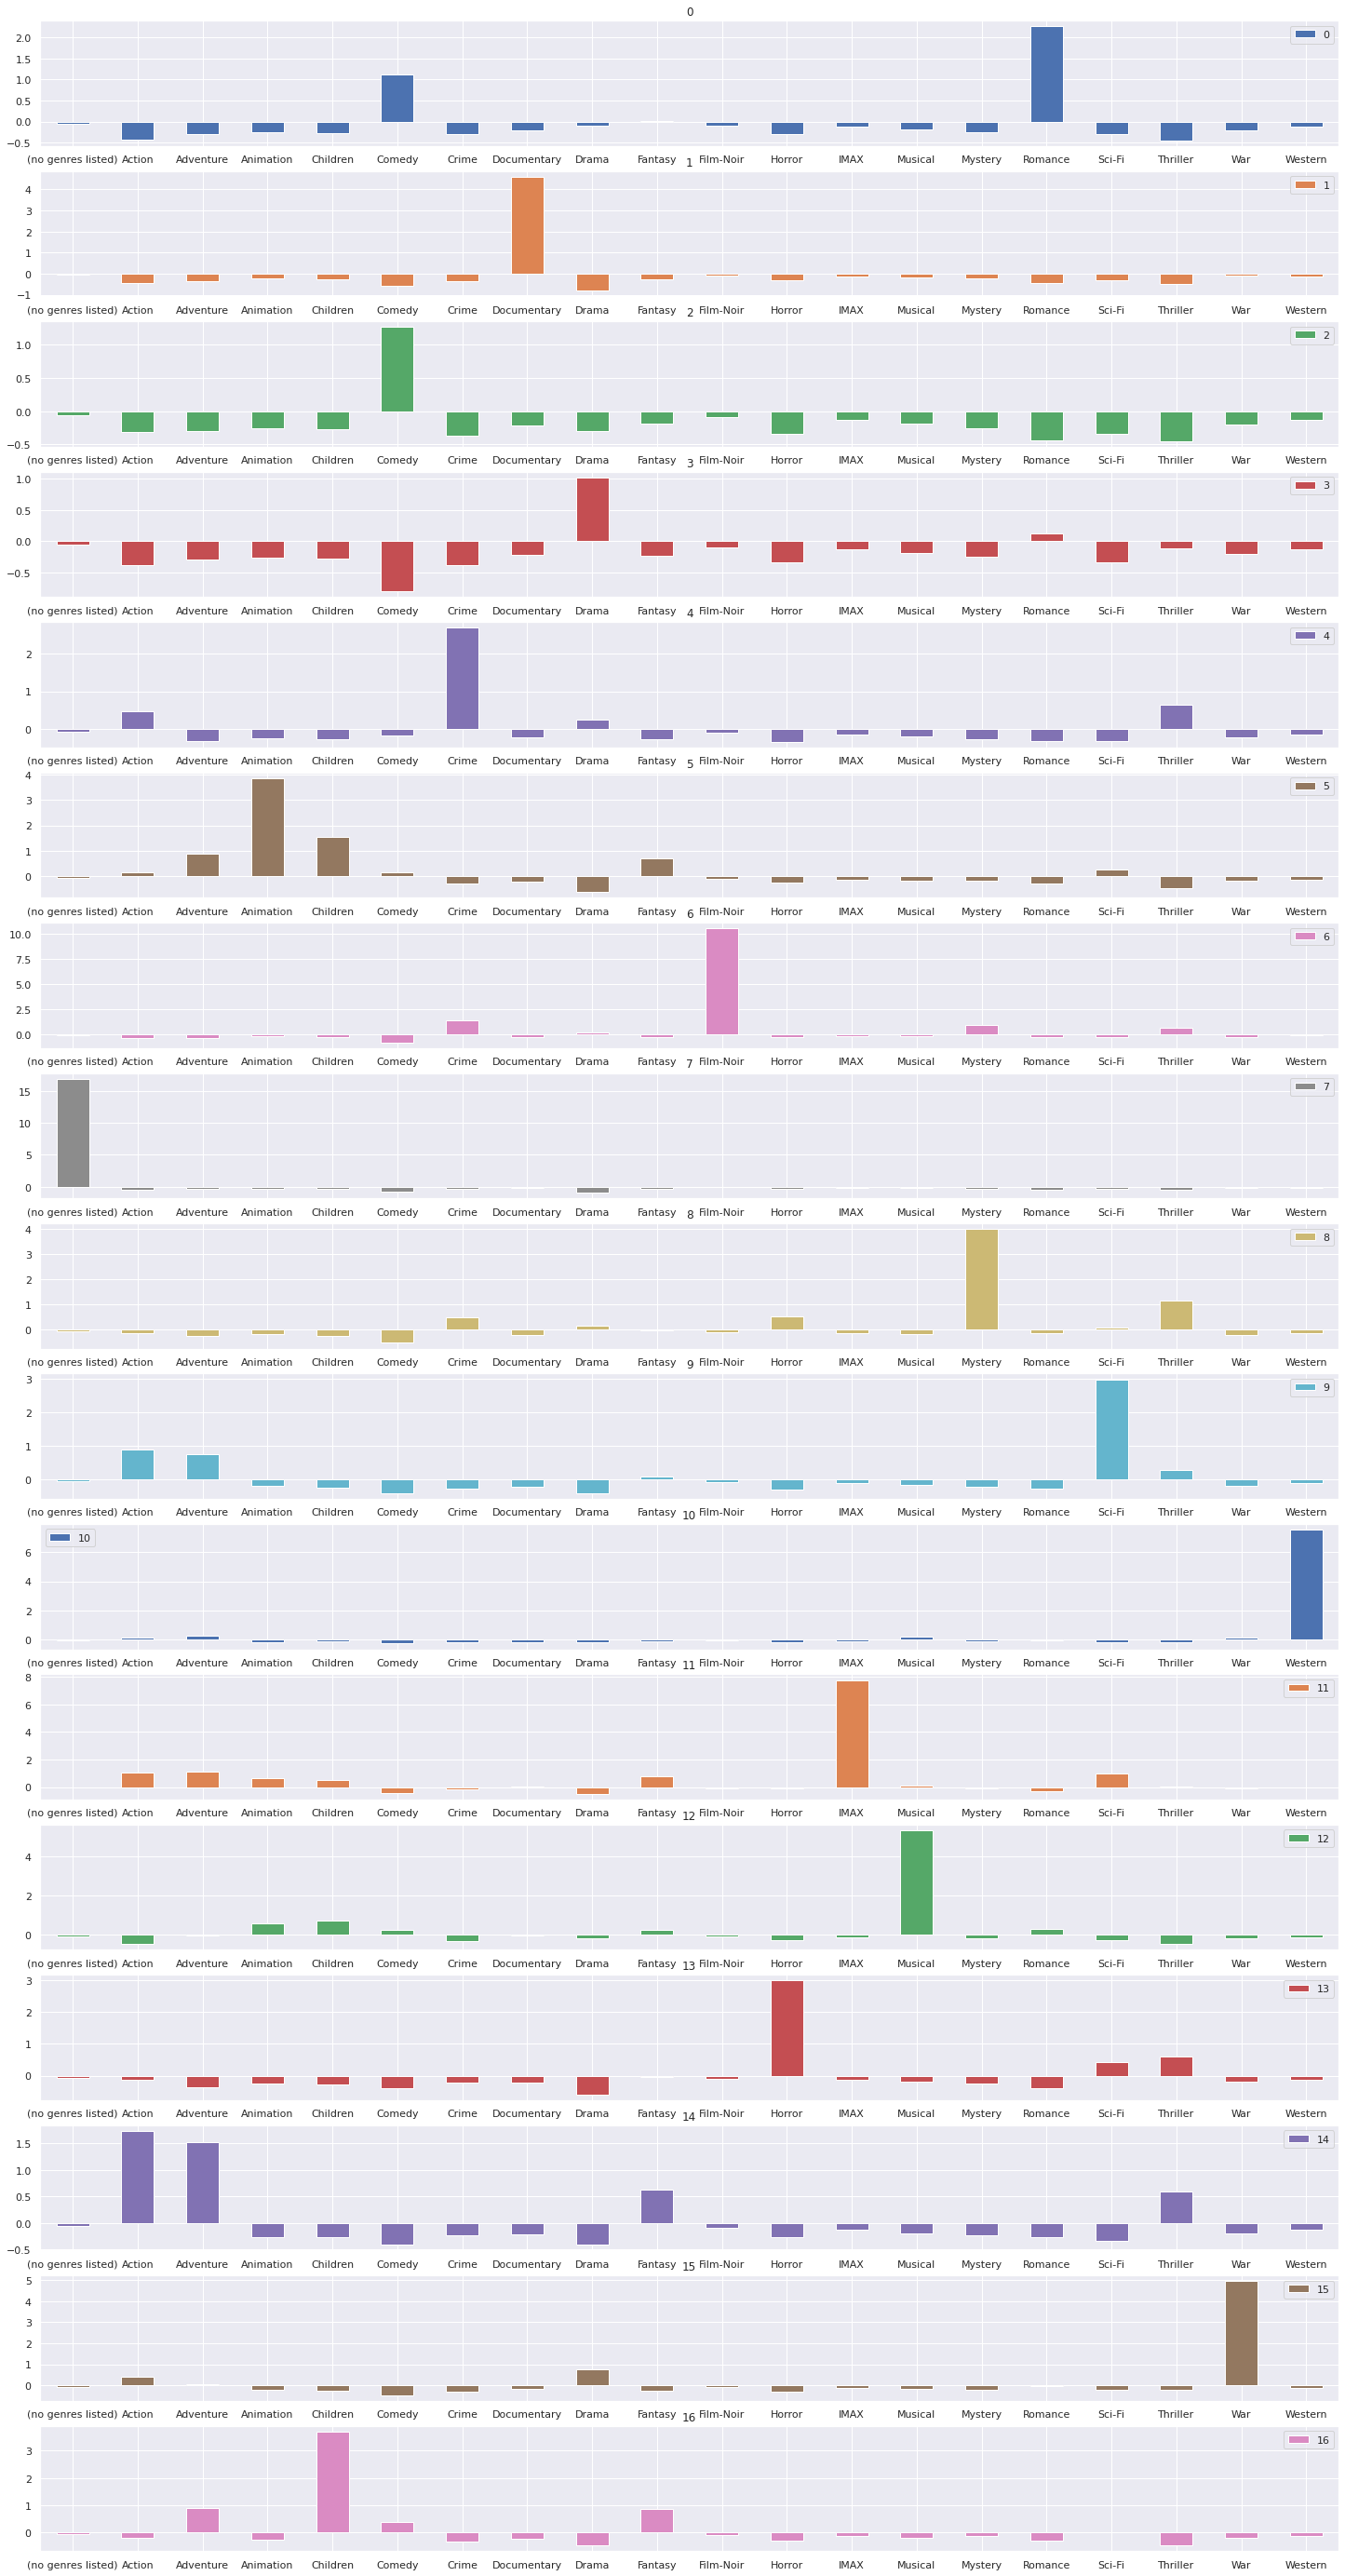

In [30]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [31]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 2.        ,  3.        ,  2.52644916,  2.        ],
       [ 0.        , 17.        ,  2.72298753,  3.        ],
       [14.        , 18.        ,  3.37115498,  4.        ],
       [ 4.        , 19.        ,  3.42869021,  5.        ],
       [ 9.        , 20.        ,  3.57253613,  6.        ],
       [13.        , 21.        ,  3.91188979,  7.        ],
       [16.        , 22.        ,  4.38690881,  8.        ],
       [ 5.        , 23.        ,  4.67707328,  9.        ],
       [ 8.        , 24.        ,  4.72881328, 10.        ],
       [ 1.        , 25.        ,  5.19321486, 11.        ],
       [15.        , 26.        ,  5.24451061, 12.        ],
       [12.        , 27.        ,  5.8172222 , 13.        ],
       [10.        , 28.        ,  7.87354743, 14.        ],
       [11.        , 29.        ,  8.18051606, 15.        ],
       [ 6.        , 30.        , 10.81216227, 16.        ],
       [ 7.        , 31.        , 17.07884745, 17.        ]])

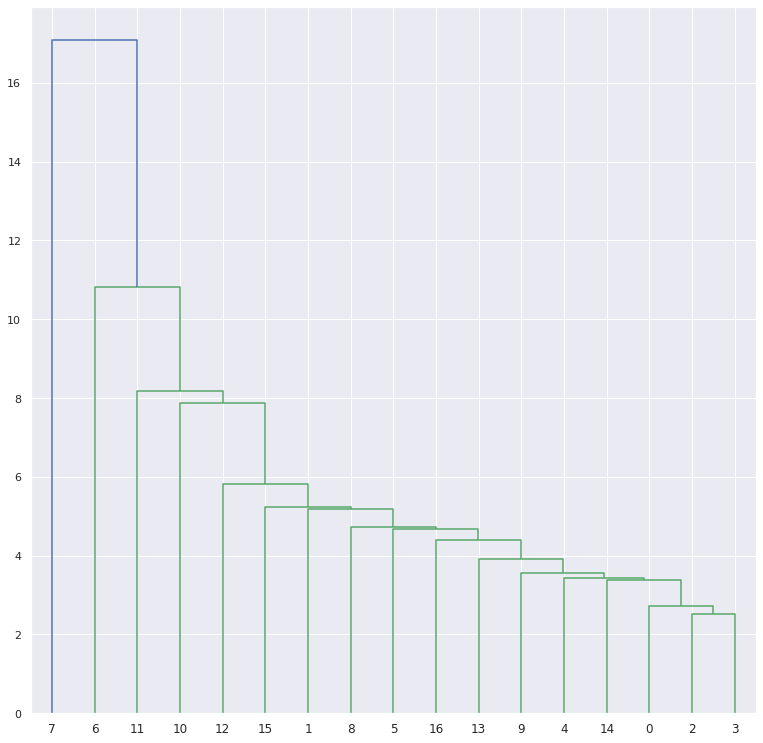

In [32]:
dendrograma = dendrogram(matriz_de_distancia)